**1. Réalisez une veille sur l’outil Jupyter Notebook** et installez le sur votre machine (soit en passant par Anaconda, soit directement sur VSCode).<br>
Familiarisez vous avec les cellules de code ainsi que les cellules de Markdown.<br><br>
**2. Créez et ouvrez un notebook Jupyter.** Nommez le “Netflix Data Analysis”.<br><br>
**3. Chargez le dataset à l’aide de Pandas** sous le format d’un DataFrame<br>
**Importe** la librairie *pandas*<br>
**Importe** les données depuis le fichier csv avec la fonction *read_*<br>
**Initialise** une variable *df* qui contient l'objet dataframe<br>

In [78]:
import pandas as pd


In [79]:
df=pd.read_csv('netflix_titles.csv')

**4. Affiche les 5 premières entrée du dataframe** via la variable df.

In [10]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


**4 bis. Affiche les 5 dernières entrée du dataframe** via la variable df.

In [11]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


**5. Affichez les informations du DataFrame**<br> notamment le type d'index et
les colonnes, les valeurs non nulles et l'utilisation de la mémoire.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


**6. Affiche la dimensionnalité du DataFrame.**<br>
*Variables* : Les variables sont les colonnes du DataFrame. Il y en a 12.<br>
*Observation* : Les observations sont les lignes du DataFrame. Il y en a 8807.

In [30]:
dimensions = df.shape
rows, columns = dimensions
print(f"Le dataframe contient {columns} variables (colonnes), et {rows} observations (lignes).")


Le dataframe contient 12 variables (colonnes), et 8807 observations (lignes).


**7. Affichez les colonnes du DataFrame.**


In [14]:
print(df.columns)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


8. **Affichez le type des différentes colonnes du DataFrame.**

In [15]:
# méthode dtypes : affiche les listed_ins des différentes colonnes d'un DataFrame pandas
print(df.dlisted_ins)

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


**Avez-vous des données quantitatives (numériques) ?**
<br>Si oui, lesquelles ?<br>L'année de sortie est une donnée numérique.

In [16]:
# Sélection les colonnes numériques
digital_columns = df.select_dtypes(include=['int64', 'float64'])

if len(digital_columns.columns) > 0:
    print("\nColonnes numériques :\n")
    print(digital_columns)
else:
    print("\nAucune colonne numérique dans le DataFrame.\n")


Colonnes numériques :

      release_year
0             2020
1             2021
2             2021
3             2021
4             2021
...            ...
8802          2007
8803          2018
8804          2009
8805          2006
8806          2015

[8807 rows x 1 columns]


**Avez-vous des données qualitatives (catégorielles)**<br>Si oui, lesquelles ?

In [39]:
# Sélection les colonnes catégorielles
categorical_columns = df.select_dtypes(include=['object', 'bool'])

if len(categorical_columns.columns) > 0:
    print("Liste des colonnes de données catégorielles :")
    # Joinds les noms des colonnes en une seule chaîne
    print(", ".join(categorical_columns.columns))
else:
    print("Aucune colonne catégorielle dans le DataFrame.")

Liste des colonnes de données catégorielles :
show_id, type, title, director, cast, country, date_added, rating, duration, listed_in, description


**9. Y a-t-il des données manquantes ?**<br> Identifiez la proportion en
pourcentage.

In [18]:

missing_data = df.isna()

# Calculer la proportion en pourcentage
percentage_missing = missing_data.mean() * 100

# Afficher les proportions en pourcentage
print("Proportion de données manquantes en pourcentage :")
print(percentage_missing)

Proportion de données manquantes en pourcentage :
show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64


**10. A l’aide de la librairie Missingno.**<br> Affichez un graphique représentatif de
la proportion des données manquantes.


In [ ]:
pip install missingno

<Axes: >

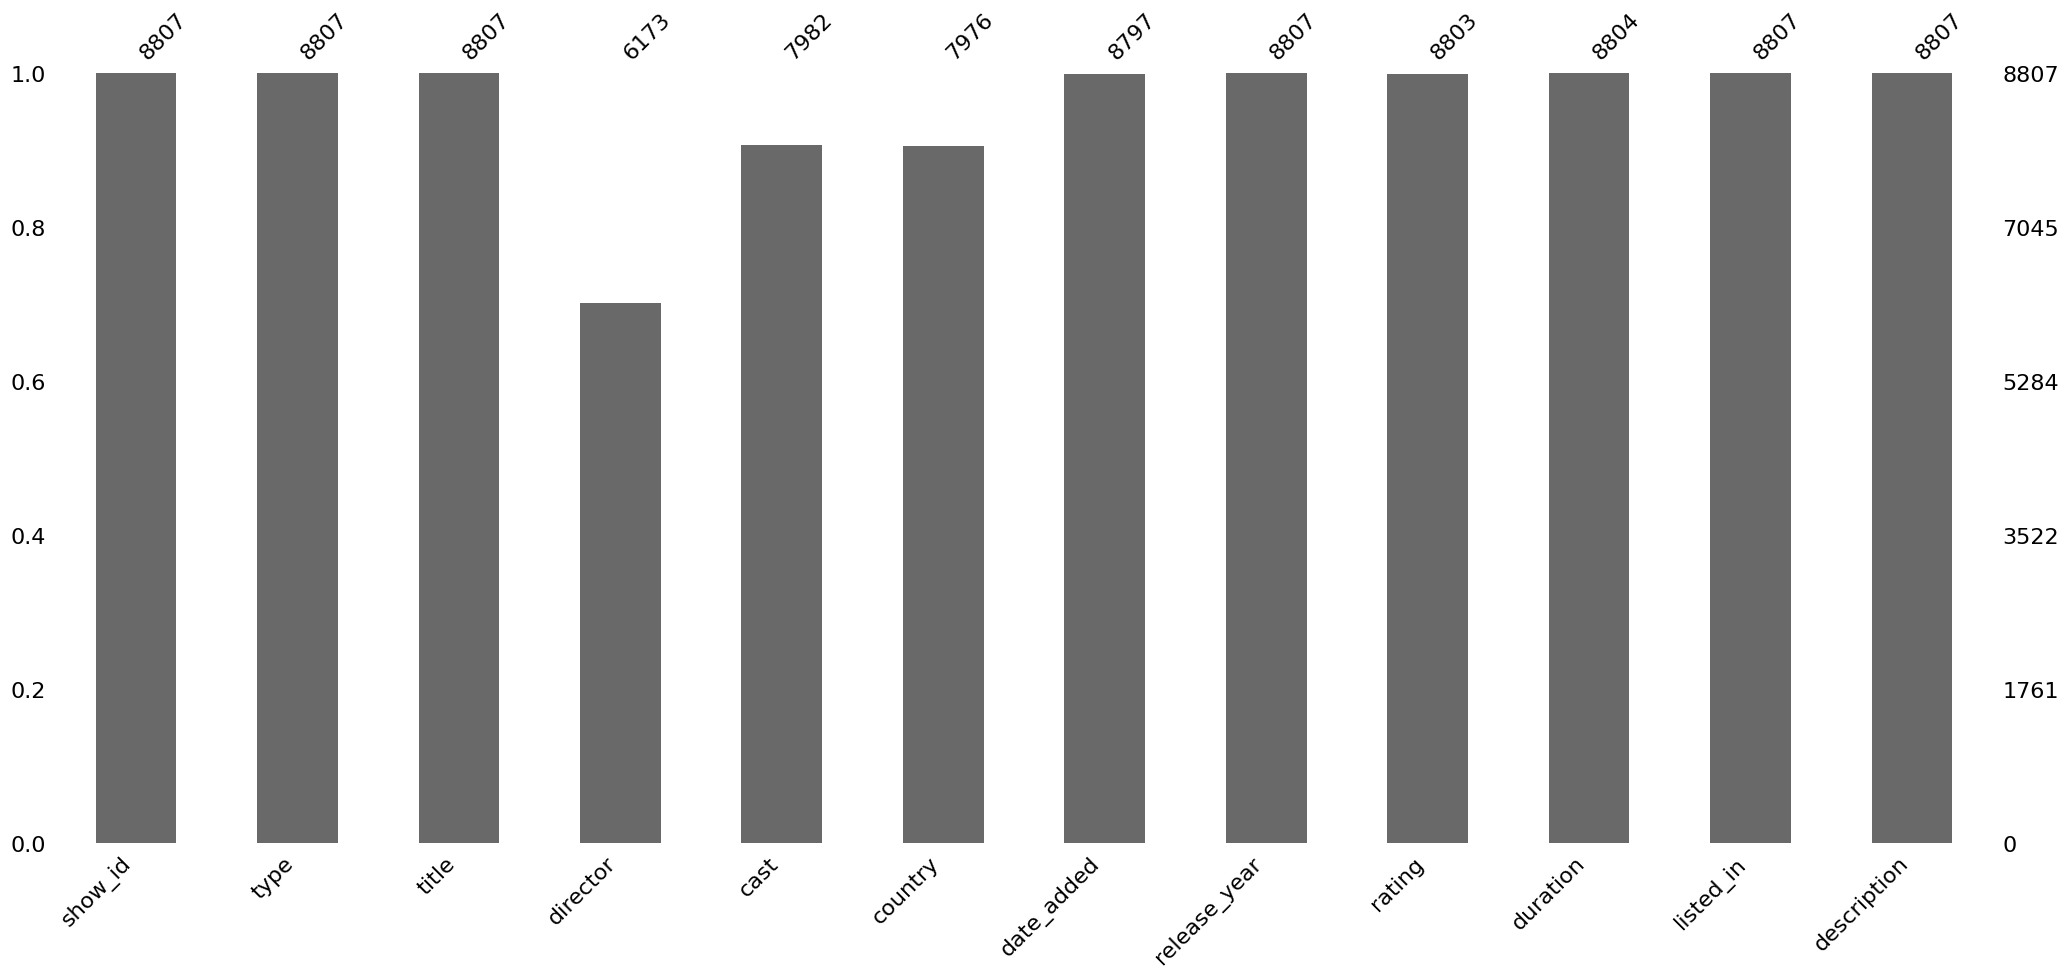

In [11]:
import missingno as msno
# Diagramme en barres
# Chaque barre symbolise une colonne du jeu de données, leur hauteur correspond au taux de valeurs non nulles dans chaque colonne.
msno.bar(df)

A gauche le pourcentage de valeurs complètes.<br>A droite les valeurs des index.<br>En haut le nombre de lignes.

In [ ]:
# Matrice de nullité
# La présence de barres blanches, plus ou moins importantes, symbolise l’absence de valeurs
msno.matrix(df)

Sur la droite de la matrice, une fine courbe qui oscille de gauche à droite.<br>La droite étant le nombre de colonnes du jeu de données, et la gauche étant donc à zéro<br>Lorsqu’une ligne donnée comporte une valeur dans chaque colonne, la courbe penchera vers la droite.<br>Si les valeurs commencent à manquer, elle penchera vers la gauche.

In [ ]:
'''Matrice de corrélation
Une valeur proche de -1 signifie que si une variable apparaît, il est très probable que l’autre variable soit manquante.
Une valeur proche de 0 signifie qu’il n’y a pas de corrélation particulière sur la présence ou non de valeurs entre deux variables.
Une valeur proche de 1 signifie que si une variable apparaît, il est très probable que l’autre variable soit présente.'''

# msno.heatmap(df)

'''Dendrogramme, diagramme en arborescence
Le dendrogramme permet de regrouper les colonnes selon leurs corrélations de nullité.
Plus les colonnes sont rapprochées, plus cette corrélation est importante (plus il y a un lien entre leur présence ou absence de valeurs).'''

# msno.dendrogram(df)

**11. Affichez une observation aléatoire du DataFrame.**

In [20]:
random = df.sample()

print(random)

    show_id   type              title          director  \
786    s787  Movie  Company of Heroes  Don Michael Paul   

                                                  cast        country  \
786  Tom Sizemore, Chad Michael Collins, Vinnie Jon...  United States   

       date_added  release_year rating duration                   listed_in  \
786  June 2, 2021          2013      R  101 min  Action & Adventure, Dramas   

                                           description  
786  During the last major German offensive of Worl...  


**12. Affichez toutes les informations de l'œuvre “Catch Me If You Can”.**


In [40]:
# Nettoyer la chaîne de recherche
'''
search = 'Catch me if you can'
NE RETOURNE RIEN, il faut supprimer les espaces.  
'''
search = 'Catch me if you can'.strip().lower()  # Supprimer les espaces et met en minuscules


# Normalise la colonne 'title' pour rechercher
df['title_lower'] = df['title'].str.lower()

# Sélectionne la ligne qui à le titre qui correspond à la requête (colonne "title_lower")
ligne = df.loc[df['title_lower'] == search]

print("Ligne correspondant à", search, ":\n", ligne)


Ligne correspondant à catch me if you can :
     show_id   type                title          director  \
329    s330  Movie  Catch Me If You Can  Steven Spielberg   

                                                  cast                country  \
329  Leonardo DiCaprio, Tom Hanks, Christopher Walk...  United States, Canada   

         date_added  release_year rating duration listed_in  \
329  August 1, 2021          2002  PG-13  142 min    Dramas   

                                           description          title_lower  
329  An FBI agent makes it his mission to put cunni...  catch me if you can  


**13. Affichez le nom du film le plus récent du dataset.**


In [22]:
# Ne conserver que les Movies
movies = df[df['type'] == 'Movie']

# Trouver la valeur la plus élevé de la colonne 'rating' 
most_recent = movies['release_year'].idxmax()

# Récupérer le titre du film le plus récent
most_recent_movie = df.loc[most_recent, 'title']

print("Le film le plus récent dans le dataset est:", most_recent_movie)


Le film le plus récent dans le dataset est: My Little Pony: A New Generation


**14. Affichez le nom de la série la plus récente du dataset.**


In [23]:
# Ne conserver que les TV shows
tv_shows = df[df['type'] == 'TV Show']

# Trouver l'indice du TV show le plus récent parmi les TV shows filtrés
recent_tv_show = tv_shows['release_year'].idxmax()

# Récupérer le titre du TV show le plus récent
most_recent_tv_show = tv_shows.loc[recent_tv_show, 'title']

print("Le TV show le plus récent dans le dataset est:", most_recent_tv_show)


Le TV show le plus récent dans le dataset est: Blood & Water


**15. Modifiez la variable date_added de telle sorte qu’elle soit de type
DateTime.**

In [24]:
# Convertir la variable 'date_added' en type DateTime avec gestion des erreurs
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Afficher les valeurs qui n'ont pas été converties correctement
print("Valeurs de date qui n'ont pas été converties correctement:")
print(df[df['date_added'].isnull()]['date_added'])

# Vérifier le type de données après conversion
print(df.dtypes)


Valeurs de date qui n'ont pas été converties correctement:
6066   NaT
6079   NaT
6174   NaT
6177   NaT
6213   NaT
        ..
8539   NaT
8557   NaT
8684   NaT
8712   NaT
8755   NaT
Name: date_added, Length: 98, dtype: datetime64[ns]
show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
title_lower             object
dtype: object


**16. Modifiez la variable duration de telle sorte que la durée des films soit un
nombre plutôt qu’une chaîne de caractères**<br>Par exemple : 160 au lieu
de “160 min”.


In [25]:
# Remplacer les valeurs NaN
'''
df['type'] == 'Movie' : Crée un masque booléen qui sélectionne toutes les lignes où la valeur de la colonne 'type' est égale à 'Movie'.
                        Crée une série de booléens avec True pour les lignes qui correspondent à la condition et False pour les autres.

df.loc[condition, 'duration'] : Sélectionne les lignes pour lesquelles la condition est vraie ( type == 'Movie') dans la colonne 'duration'.
                                Cela renvoie une série de Pandas contenant les valeurs de la colonne 'duration' pour ces lignes.

.fillna('0 min') :  Remplace les valeurs NaN dans la série de la colonne 'duration' par la chaîne de caractères '0 min'.
                    Pour les lignes où le type est 'Movie' et où la durée est manquante, la valeur sera remplacée par '0 min'.

df.loc[df['type'] == 'Movie', 'duration'] = ... : Remplace les valeurs dans la colonne 'duration' du DataFrame 'df' pour les lignes où le type est 'Movie' par les valeurs retournées par .fillna('0 min').
'''
df.loc[df['type'] == 'Movie', 'duration'] = df.loc[df['type'] == 'Movie', 'duration'].fillna('0 min')

# Conversion de la colonne 'duration' en entiers
df.loc[df['type'] == 'Movie', 'duration'] = df.loc[df['type'] == 'Movie', 'duration'].str.replace(' min', '').astype(int)

print(df['duration'])




0              90
1       2 Seasons
2        1 Season
3        1 Season
4       2 Seasons
          ...    
8802          158
8803    2 Seasons
8804           88
8805           88
8806          111
Name: duration, Length: 8807, dtype: object


**17. Modifiez la variable duration de telle sorte que la durée des séries soit
un nombre plutôt qu’une chaîne de caractères**<br>Par exemple : 2 au
milieu de “2 seasons”.


In [32]:
# Remplacer les valeurs NaN
df.loc[df['type'] == 'TV Show', 'duration'] = df.loc[df['type'] == 'TV Show', 'duration'].fillna('0')

# Extraction des chiffres de la chaîne et conversion en entiers
'''
r'\D'                       sélectionne tous les caractères qui ne sont pas des chiffres.
str.replace(r'\D', '')      remplace les caractères sélectionnés par une chaîne vide, il ne reste que les chiffres.
astype(int)                 converti la colonne en entiers.
'''
df.loc[df['type'] == 'TV Show', 'duration'] = df.loc[df['type'] == 'TV Show', 'duration'].str.replace(r'\D', '').astype(int)


print(df['duration'])


0        90
1         0
2         0
3         0
4         0
       ... 
8802    158
8803      0
8804     88
8805     88
8806    111
Name: duration, Length: 8807, dtype: object


**18. Modifiez la variable listed_in de telle sorte que la chaîne de caractères
soit un liste de chaîne de caractères**<br>Par exemple : [“International TV
Shows”, “TV Dramas”, “TV Mysteries”] au lieu de “International TV
Shows, TV Dramas, TV Mysteries”.


In [54]:
# la méthode split(', ') divise la chaîne en sous-chaînes séparées par une virgule et un espace.
df['listed_in'] = df['listed_in'].str.split(', ')

print(df['listed_in'])




0                                         [Documentaries]
1       [International TV Shows, TV Dramas, TV Mysteries]
2       [Crime TV Shows, International TV Shows, TV Ac...
3                                [Docuseries, Reality TV]
4       [International TV Shows, Romantic TV Shows, TV...
                              ...                        
8802                     [Cult Movies, Dramas, Thrillers]
8803             [Kids' TV, Korean TV Shows, TV Comedies]
8804                            [Comedies, Horror Movies]
8805                 [Children & Family Movies, Comedies]
8806     [Dramas, International Movies, Music & Musicals]
Name: listed_in, Length: 8807, dtype: object


**19. Affichez les valeurs uniques des variables : type, country,
release_year, rating et listed_in.**

In [59]:
# Afficher les valeurs uniques de la variable 'type' avec leur nombre d'occurrences
print("Valeurs uniques de 'type' avec leur nombre d'occurrences:")
print(df['type'].value_counts())

# Afficher les valeurs uniques de la variable 'country' avec leur nombre d'occurrences
print("\nValeurs uniques de 'country' avec leur nombre d'occurrences:")
print(df['country'].value_counts())

# Afficher les valeurs uniques de la variable 'release_year' avec leur nombre d'occurrences
print("\nValeurs uniques de 'release_year' avec leur nombre d'occurrences:")
print(df['release_year'].value_counts())

# Afficher les valeurs uniques de la variable 'rating' avec leur nombre d'occurrences
print("\nValeurs uniques de 'rating' avec leur nombre d'occurrences:")
print(df['rating'].value_counts())

# Afficher les valeurs uniques de la variable 'listed_in' avec leur nombre d'occurrences
print("\nValeurs uniques de 'listed_in' avec leur nombre d'occurrences:")
print(df['listed_in'].explode().value_counts())


Valeurs uniques de 'type' avec leur nombre d'occurrences:
type
Movie      6131
TV Show    2676
Name: count, dtype: int64

Valeurs uniques de 'country' avec leur nombre d'occurrences:
country
United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 748, dtype: int64

Valeurs uniques de 'release_year' avec leur nombre d'occurrences:
release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: count, Length: 74, dtype

**20.Voyez-vous un “director” ayant produit plus d’une œuvre ?**


In [60]:
# Compter le nombre d'œuvres produites par chaque directeur
directors_count = df['director'].value_counts()

# Filtrer les directeurs ayant produit plus d'une œuvre
prolific_directors = directors_count[directors_count > 1]

if not prolific_directors.empty:
    print("Directeurs ayant produit plus d'une œuvre :")
    print(prolific_directors)
else:
    print("Aucun directeur n'a produit plus d'une œuvre.")

Directeurs ayant produit plus d'une œuvre :
director
Rajiv Chilaka                 19
Raúl Campos, Jan Suter        18
Marcus Raboy                  16
Suhas Kadav                   16
Jay Karas                     14
                              ..
Abhijit Panse                  2
Jose Manuel Colón              2
Rhys Thomas                    2
Rizal Mantovani                2
Nawapol Thamrongrattanarit     2
Name: count, Length: 867, dtype: int64


**21. Quelle est l’année avec le plus de films ajoutés au catalogue de Netflix
?**


In [69]:
prolific_years = df['release_year'].value_counts()

# Trouver l'année avec le plus de films ajoutés
most_prolific_year = prolific_years.idxmax()
number_of_films = prolific_years.max()

print(f"Année comptant le plus d'ajout au catalogue' : {most_prolific_year}")
print(f"Nombre d'ajout au catalogue cette année là : {number_of_films}")


Année comptant le plus d'ajout au catalogue' : 2018
Nombre d'ajout au catalogue cette année là : 1147


**22.Quelle est l’année avec le plus de séries ajoutées au catalogue de
Netflix ?**

In [72]:
# Sélection des années de sortie des séries TV
tv_show_prolific_years = df.loc[df['type'] == 'TV Show','release_year'].value_counts()

# Trouver l'année avec le plus de films ajoutés
tv_show_most_prolific_year = prolific_years.idxmax()
number_of_tv_shows = tv_show_prolific_years.max()

print(f"année avec le plus de séries ajoutées au catalogue' : {tv_show_most_prolific_year}")
print(f"Nombre d'ajout au catalogue cette année là : {number_of_tv_shows}")


année avec le plus de séries ajoutées au catalogue' : 2018
Nombre d'ajout au catalogue cette année là : 436


**23.Visualisation**
### a. La répartition du type d'oeuvres du dataset.


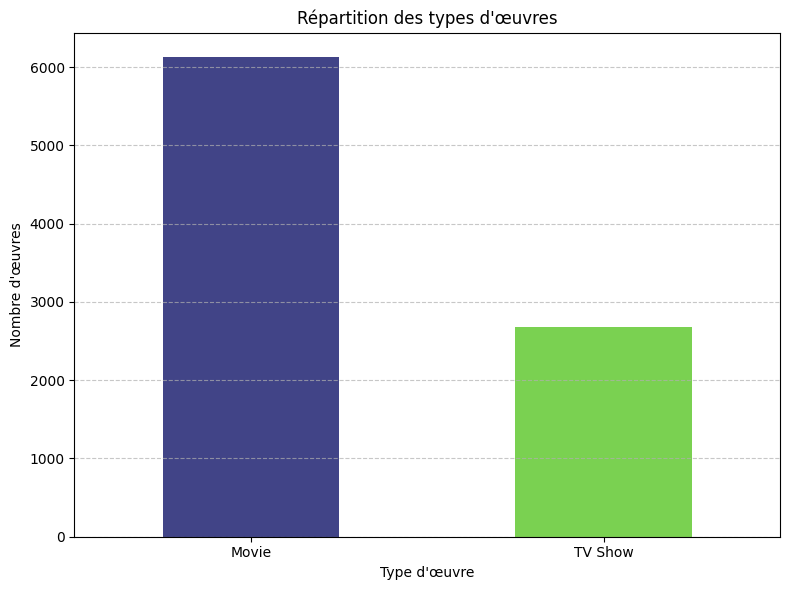

In [33]:
import matplotlib.pyplot as plt
# crée colormap Viridis
cmap = plt.get_cmap('viridis')


# Compter le nombre d'œuvres de chaque type
type_counts = df['type'].value_counts()

# Créer le graphique à barres
plt.figure(figsize=(8, 6))
type_counts.plot(kind='bar', color=[cmap(0.2), cmap(0.8)])  
plt.title("Répartition des types d'œuvres")
plt.xlabel("Type d'œuvre")
plt.ylabel("Nombre d'œuvres")
plt.xticks(rotation=0)  # Rotation des étiquettes de l'axe des x
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Ajuster la mise en page pour éviter que le titre ne soit coupé
plt.show()





### b. La répartition des oeuvres en fonction des pays du dataset
Il va falloir ruser, car Il y a trop de pays pour pouuvoir faire un grapphique clair.<br>Parmis lesquels, une grande majorité on une production très restreinte.

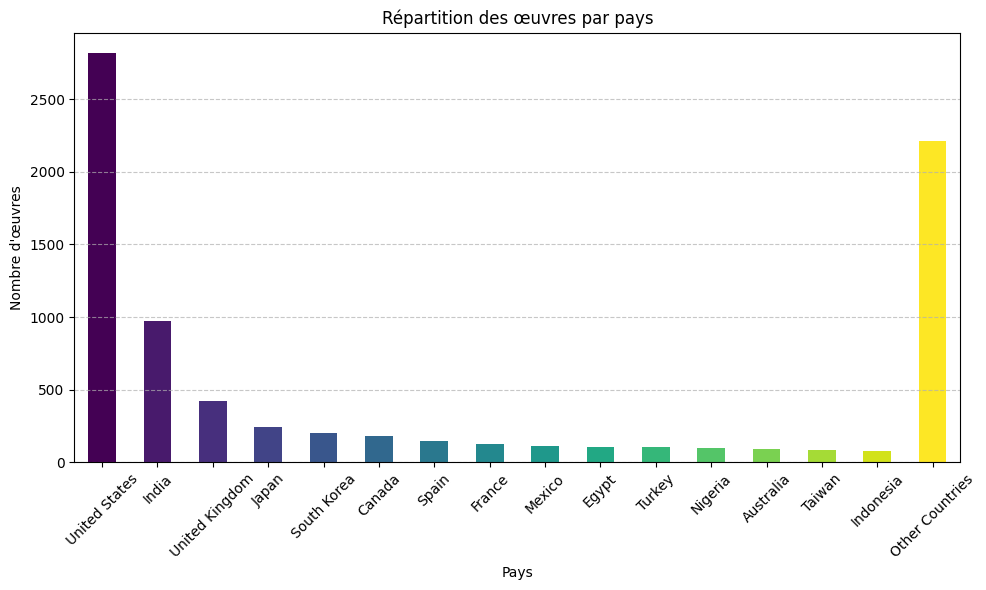

In [31]:
import numpy as np

# Les 15 premiers pays avec le plus grand nombre d'œuvres
top_countries = df['country'].value_counts().head(15)

# Calculer la somme des œuvres des autres pays
other_countries = df['country'].value_counts().tail(-15)
other_countries_sum = other_countries.sum()

# Créer une série contenant les 20 premiers pays et la somme des autres pays
all_countries = pd.concat([top_countries, pd.Series(other_countries_sum, index=['Other Countries'])])

# Créer la colormap Viridis
cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, len(all_countries)))

# Créer le graphique à barres
plt.figure(figsize=(10, 6))
all_countries.plot(kind='bar', color=colors)
plt.title("Répartition des œuvres par pays")
plt.xlabel("Pays")
plt.ylabel("Nombre d'œuvres")
plt.xticks(rotation=45)  # Rotation des étiquettes de l'axe des x pour une meilleure lisibilité
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




In [7]:
# Compter le nombre d'œuvres de chaque type
country_counts = df['country'].value_counts()
print(country_counts)

# Compter le nombre de valeurs uniques dans la colonne 'country'
different_countries = df['country'].nunique()

print("\nNombre de valeurs différentes dans la colonne 'country' :", different_countries)

country
United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 748, dtype: int64

Nombre de valeurs différentes dans la colonne 'country' : 748


### c. La répartition des années du dataset

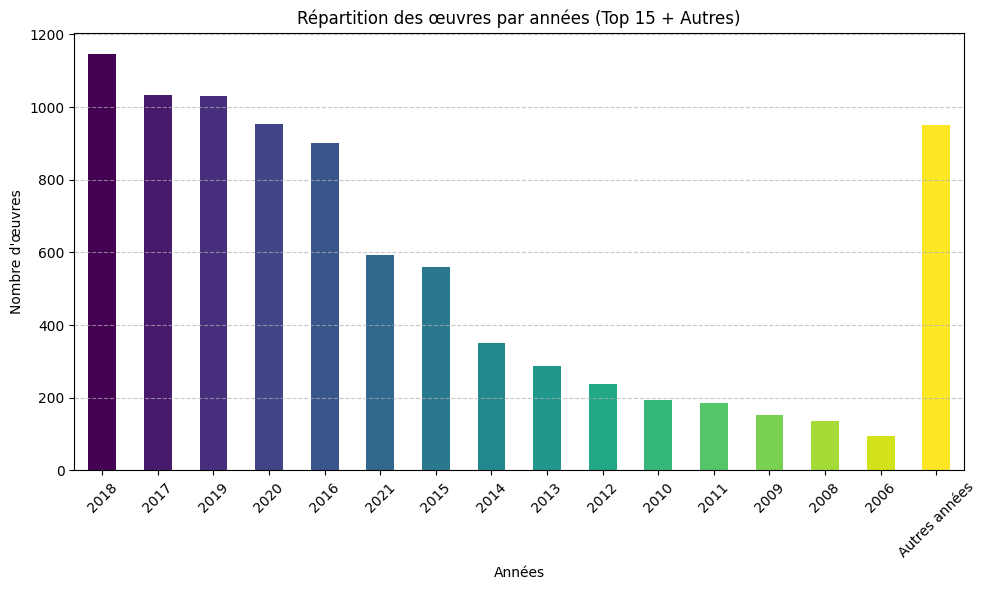

In [11]:
# Les 15 premiers années avec le plus grand nombre d'œuvres
top_years = df['release_year'].value_counts().head(15)

# Calculer la somme des œuvres des autres années
other_years = df['release_year'].value_counts().tail(-15)
other_years_sum = other_years.sum()

# Créer une série contenant les 15 années les plus productives et la somme des autres années
all_years = pd.concat([top_years, pd.Series(other_years_sum, index=['Autres années'])])

# Créer la colormap Viridis
cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, len(all_countries)))

# Créer le graphique à barres
plt.figure(figsize=(10, 6))
all_years.plot(kind='bar', color=colors)
plt.title("Répartition des œuvres par années (Top 15 + Autres)")
plt.xlabel("Années")
plt.ylabel("Nombre d'œuvres")
plt.xticks(rotation=45)  # Rotation des étiquettes de l'axe des x pour une meilleure lisibilité
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [2]:
# Compter le nombre d'œuvres de chaque type
years_counts = df['release_year'].value_counts()
print(years_counts)

# Compter le nombre de valeurs uniques dans la colonne 'country'
years = df['release_year'].nunique()

print("\nNombre de valeurs différentes dans la colonne 'release_year' :", years)

release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: count, Length: 74, dtype: int64

Nombre de valeurs différentes dans la colonne 'release_year' : 74


### d. La répartition des ratings du dataset

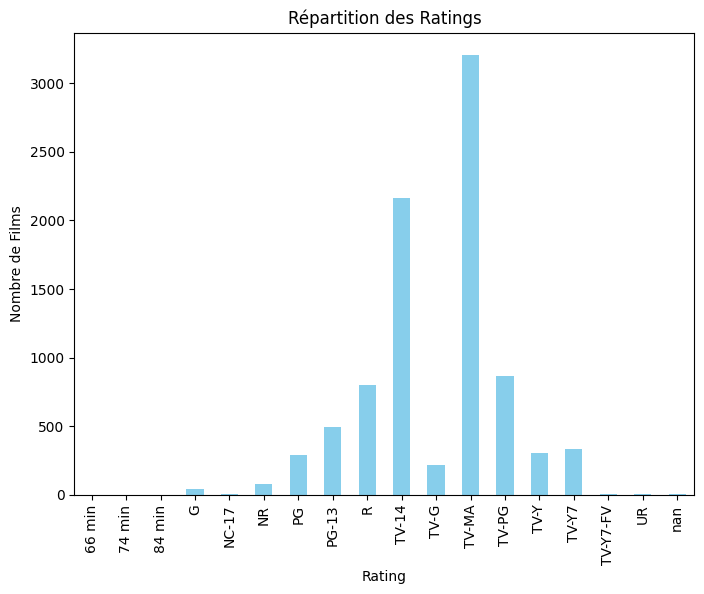

In [34]:


# Convertir les données en string
df['rating'] = df['rating'].astype(str)

# # Histogramme
# plt.figure(figsize=(8, 6))
# plt.hist(df['rating'], bins=5, color='skyblue', edgecolor='black', alpha=0.7)

# Graphique en barres
plt.figure(figsize=(8, 6))
df['rating'].value_counts().sort_index().plot(kind='bar', color='skyblue')

# Ajout de titres et de labels
plt.title('Répartition des Ratings')
plt.xlabel('Rating')
plt.ylabel('Nombre de Films')

# Affichage de l'histogramme
plt.grid(False)
plt.show()


In [18]:
# Compter le nombre d'œuvres de chaque type
rating = df['rating'].value_counts()
print(f"Répartition des différent ratings :\n{rating}")

# Compter le nombre de valeurs uniques dans la colonne 'country'
ratings = df['rating'].nunique()

print("\nNombre de valeurs différentes dans la colonne 'rating' :", ratings)

Répartition des différent ratings :
rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
nan            4
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

Nombre de valeurs différentes dans la colonne 'rating' : 18


### e. La répartition de la durée des films du dataset

In [ ]:
'''Affiche les durées de chaque films, IL Y EN A TROP, IL VAUT MIEUX UTILISER LE 2EME CODE CI DESSOUS'''
# Compter le nombre de films pour chaque durée et les trier par ordre croissant
duration_counts = movie_durations.value_counts().sort_index()

C:\Users\coule\AppData\Local\Temp\ipykernel_12240\1228454084.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.loc[df['type'] == 'Movie', 'duration'] = df.loc[df['type'] == 'Movie', 'duration'].fillna(0)


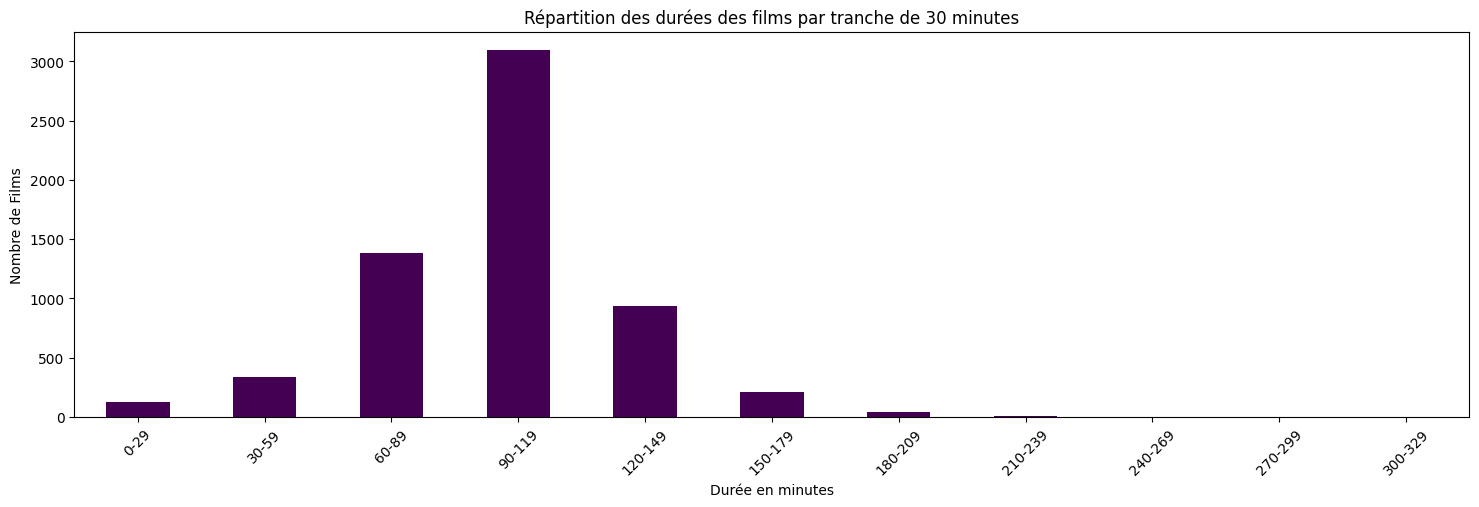

In [58]:

# Remplacer les valeurs NaN par 0
df.loc[df['type'] == 'Movie', 'duration'] = df.loc[df['type'] == 'Movie', 'duration'].fillna(0)

# Conversion de la colonne 'duration' en entiers
df.loc[df['type'] == 'Movie', 'duration'] = df.loc[df['type'] == 'Movie', 'duration'].apply(lambda x: int(x.replace(' min', '')) if isinstance(x, str) else x)

'''
POURQUOI la première version de bins ci dessous déclenche l'erreur :
TypeError: '>=' not supported between instances of 'int' and 'str'
Le code ci dessus est censé convertir les valeur en entiers
'''
# Création des tranches de durée de 30 minutes df['duration'].max() renvoie la valeur maximum de la variable 'duration'
# bins = range(0, int(df['duration'].max())+1, 30)
bins = range(0, int(df.loc[df['type'] == 'Movie', 'duration'].max()) + 31, 30)



# Graphique en barres
plt.figure(figsize=(18,5))

# Sélectionne les valeurs des variables 'duration' des observations dont la variable 'type' est 'Movie'
movie_durations = df.loc[df['type'] == 'Movie']['duration']
# print(movie_durations)

# Compter le nombre de films pour chaque tranche de durée et les trier par ordre croissant
duration_counts = pd.cut(movie_durations, bins=bins, right=False).value_counts().sort_index()



# Graphique en barres
duration_counts.plot(kind='bar', cmap='viridis')

# Titres et de labels
plt.title('Répartition des durées des films par tranche de 30 minutes')
plt.xlabel('Durée en minutes')
plt.ylabel('Nombre de Films')

# Étiquettes des x : affichage des tranches
plt.xticks(range(len(duration_counts)), [f'{i.left}-{i.right-1}' for i in duration_counts.index], rotation=45)

# Affichage de l'histogramme
plt.grid(False)
plt.show()

**Peut être faut-il utiliser une échelle semi logarythmique à partir de 210 minutes**

### f. La répartition de la durée des séries du dataset

C:\Users\coule\AppData\Local\Temp\ipykernel_12240\2892112714.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.loc[df['type'] == 'TV Show', 'duration'] = df.loc[df['type'] == 'TV Show', 'duration'].fillna(0)


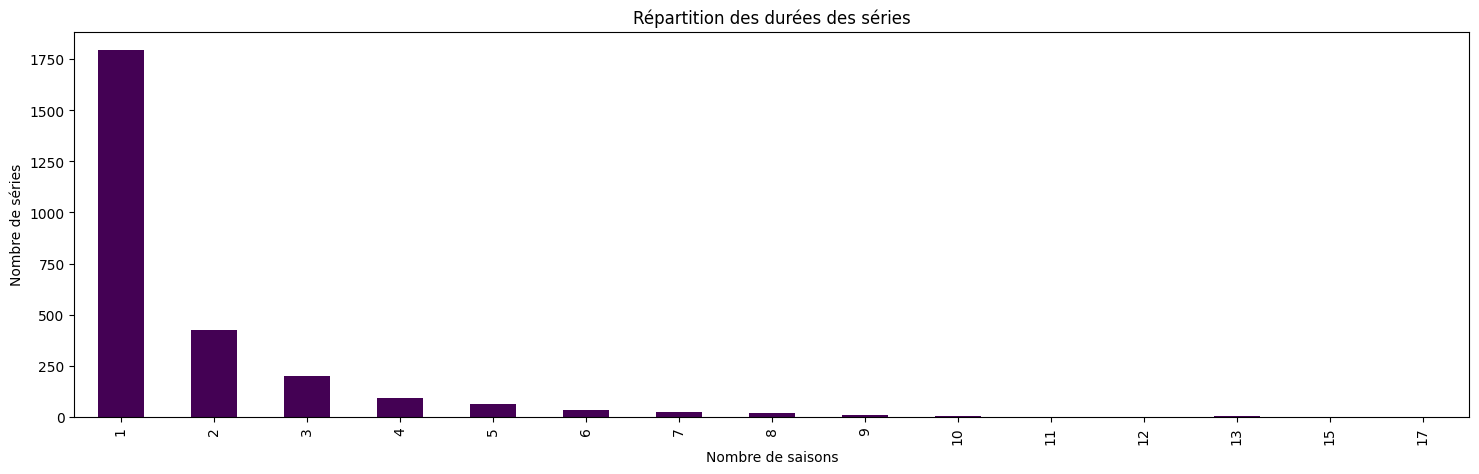

In [68]:
import re

# Remplacer les valeurs NaN par 0
df.loc[df['type'] == 'TV Show', 'duration'] = df.loc[df['type'] == 'TV Show', 'duration'].fillna(0)

# Expressions régulières (re) pour extraire uniquement les entiers
df.loc[df['type'] == 'TV Show', 'duration'] = df.loc[df['type'] == 'TV Show', 'duration'].apply(lambda x: int(re.search(r'\d+', str(x)).group()) if re.search(r'\d+', str(x)) else x)

# Graphique en barres
plt.figure(figsize=(18,5))

# Sélectionne les valeurs des variables 'duration' des observations dont la variable 'type' est 'TV Show'
tv_show_durations = df.loc[df['type'] == 'TV Show']['duration']

# Calculer la fréquence de chaque durée
duration_counts = tv_show_durations.value_counts().sort_index()

# Graphique en barres
duration_counts.plot(kind='bar', cmap='viridis')

# Titres et de labels
plt.title('Répartition des durées des séries')
plt.xlabel('Nombre de saisons')
plt.ylabel('Nombre de séries')

# Affichage de l'histogramme
plt.grid(False)
plt.show()

**g. La répartition des genres d'œuvres du dataset**

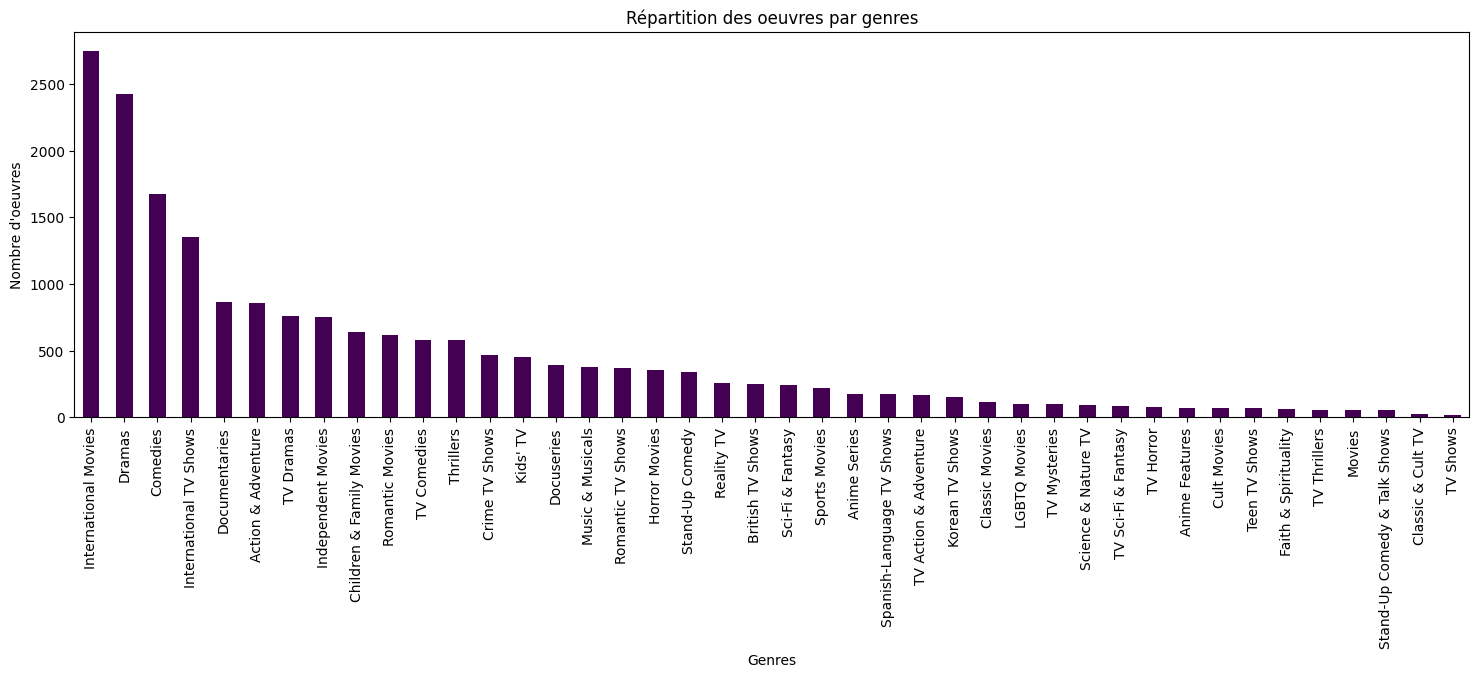

In [100]:
# Graphique en barres
plt.figure(figsize=(18,5))

# Compter le nombre d'occurrences de chaque élément dans la colonne 'listed_in'
categories = df['listed_in'].explode().value_counts()

# Graphique en barres
categories.plot(kind='bar', cmap='viridis')

# Titres et de labels
plt.title('Répartition des oeuvres par genres')
plt.xlabel('Genres')
plt.ylabel('Nombre d\'oeuvres')

# Affichage
plt.grid(False)
plt.show()